## Cyclistic Bike Share Data Analysis

### Introduction

This case study is the Capstone Project for the Google Data Analytics Professional Certificate. In this case study, I am a junior data analyst in the marketing analyst team at Cyclistic, a fictitious bike-share company in Chicago.

Cyclistic is a bike-share programme with over 5,800 bicycles and 600 docking stations. Cyclistic distinguishes itself by also providing reclining bikes, hand tricycles, and cargo bikes, making bike-share more accessible to people with disabilities and riders who cannot use a standard two-wheeled bike. The majority of riders prefer traditional bikes, with approximately 8% opting for assistive options. Cyclists are more likely to ride for pleasure, but about 30% use them to commute to work every day.

Cyclistic launched a successful bike-share programme in 2016. Since then, the programme has grown to a fleet of 5,824 geotracked bicycles that are locked into a network of 692 stations throughout Chicago. The bikes can be unlocked at any time from any station in the system and returned to any other station in the system.

The director of marketing believes that increasing the number of annual memberships is critical to the company's future success. As a result, my team is interested in learning how casual riders and annual members use Cyclistic bikes differently. Our team will develop a new marketing strategy based on the findings to convert casual riders into annual members. However, Cyclistic executives must first approve our recommendations, which must be supported by compelling data insights and professional data visualisations.

There are 3 pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as Casual riders. Customers who purchase annual memberships are Cyclistic members.

In order to answer the key business questions, I followed the steps of the data analysis process: ask, prepare, process, analyze, share, and act.



### Ask

How do Annual members and Casual riders use Cyclistic bikes differently?

The key stakeholders are:

1. Lily Moreno, the director of marketing and my manager.
2. Cyclistic executive team.



### Prepare

The data I used is Cyclistic’s Historical Trip Data to analyze and identify trends.

The previous 12 months data from 01 April 2020 to 30th March 2021 is used for analysis.

The data is stored in CSV files. Each file contains one month data. Thus a total of 12 .csv files.

The data is structured data ie., Organised data.

The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are appropriate.

The data has been made available by Motivate International Inc.

As this data is collected by a real bike sharing company in Chicago, there are no issues with bias or credibility. So its Reliable, Original, Current and Cited (as in ROCCC). 

As of data Integrity, its Accurate, Consistent and Trustworthy.

### Process

### Importing all the necessary libraries


In [69]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

### Importing 12 csv files

In [6]:
Apr_2020 = pd.read_csv("202004-divvy-tripdata.csv")
May_2020 = pd.read_csv("202005-divvy-tripdata.csv")
Jun_2020 = pd.read_csv("202006-divvy-tripdata.csv")
Jul_2020 = pd.read_csv("202007-divvy-tripdata.csv")
Aug_2020 = pd.read_csv("202008-divvy-tripdata.csv")
Sep_2020 = pd.read_csv("202009-divvy-tripdata.csv")
Oct_2020 = pd.read_csv("202010-divvy-tripdata.csv")
Nov_2020 = pd.read_csv("202011-divvy-tripdata.csv")
Dec_2020 = pd.read_csv("202012-divvy-tripdata.csv")
Jan_2021 = pd.read_csv("202101-divvy-tripdata.csv")
Feb_2021 = pd.read_csv("202102-divvy-tripdata.csv")
Mar_2021 = pd.read_csv("202103-divvy-tripdata.csv")

### Joining 12 CSV's as 1

In [7]:
df = pd.concat([Apr_2020,May_2020,Jun_2020,Jul_2020,Aug_2020,Sep_2020,Oct_2020,Nov_2020,Dec_2020,Jan_2021,Feb_2021,Mar_2021], ignore_index = True)

In [8]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


### Data Cleaning

### Dropping columns that are not relevant for the analysis

In [9]:
df = df.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])

In [10]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,casual


In [11]:
df.dtypes

ride_id          object
rideable_type    object
started_at       object
ended_at         object
member_casual    object
dtype: object

### Coverting datatype of "started_at" & "ended_at" columns to "datetime64" type.

In [12]:
df['started_at'] = df['started_at'].astype('datetime64')
df['ended_at'] = df['ended_at'].astype('datetime64')

### Creating new column "ride_length" and changing its datatype to "int32"

In [21]:
df['ride_length'] = df.ended_at.sub(df.started_at)/pd.Timedelta(minutes=1)
df['ride_length'] = df['ride_length'].astype('int32')

In [22]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,member,26
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,member,8
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,member,14
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,member,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,casual,52


In [25]:
df.sort_values(by=['ride_length'],ascending=True)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
3044386,3ED2B8BCE6A914EF,electric_bike,2020-12-15 12:10:14,2020-11-25 08:00:16,member,-29049
3010031,6DF34F98F5DB335F,electric_bike,2020-12-15 11:35:39,2020-11-25 07:40:56,member,-29034
3009188,BE1F691E387D7072,docked_bike,2020-12-15 11:34:23,2020-11-25 08:00:15,member,-29014
3071081,321F7AE3AEDBAA13,docked_bike,2020-12-15 12:12:43,2020-11-25 08:42:16,member,-29010
3074111,BB4697B59E3FF12A,docked_bike,2020-12-15 11:34:38,2020-11-25 08:09:43,member,-29004
...,...,...,...,...,...,...
2074907,6F7C2DA80561D60C,docked_bike,2020-09-06 23:20:29,2020-10-12 11:46:25,casual,51145
32054,610943B07C04C09A,docked_bike,2020-04-04 23:10:33,2020-05-12 13:35:00,member,54144
2037998,F6A59D72627F2711,docked_bike,2020-09-02 18:34:33,2020-10-10 11:17:54,casual,54283
83799,F423D1055877936F,docked_bike,2020-04-03 16:33:09,2020-05-12 08:37:02,casual,55683


We can see that in some of the cases the ride_length is negative. It can happen when the ending time entered is earlier that the starting time entered. 
This can't be true in real life so we are going to take only values that are greater than 0.


In [30]:
df[df['ride_length']<0].count()

ride_id          1229
rideable_type    1229
started_at       1229
ended_at         1229
member_casual    1229
ride_length      1229
dtype: int64

I will drop all negative values as this data is wrong

In [31]:
df.drop(df[df.ride_length < 0].index, inplace=True)

In [34]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,member,26
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,member,8
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,member,14
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,member,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,casual,52


### Change datatypes of the remaining columns

In [42]:
df = df.astype({'ride_id':'string', 'rideable_type':'category', 'member_casual':'category'})

In [43]:
df.dtypes

ride_id                  string
rideable_type          category
started_at       datetime64[ns]
ended_at         datetime64[ns]
member_casual          category
ride_length               int32
dtype: object

In [44]:
df.isnull().sum() #checking for null values

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
ride_length      0
dtype: int64

In [77]:
df['ride_id'] = df['ride_id'].str.strip() #removing white spaces if any

In [78]:
df[df['ride_id'].duplicated()] #Checking for duplicate values

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,Year,Month,Day_of_Week,Hour


### Analyse and share

### Adding more columns for better analysis

In [71]:
df['Year'] = df['started_at'].dt.year

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = df['started_at'].dt.month_name()
df['Month'] = df['Month'].astype(CategoricalDtype(categories=month_names, ordered=False))

weekday_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['Day_of_Week'] = df['started_at'].dt.day_name()
df['Day_of_Week'] = df['Day_of_Week'].astype(CategoricalDtype(categories=weekday_names, ordered=False))

df['hour'] = df['started_at'].dt.hour


In [76]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,Year,Month,Day_of_Week,Hour
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,member,26,2020,April,Sunday,17
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,member,8,2020,April,Friday,17
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,member,14,2020,April,Wednesday,17
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,member,12,2020,April,Tuesday,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,casual,52,2020,April,Saturday,10


In [60]:
df = df.astype({'Month':'category', 'Day_of_Week':'category'})

In [61]:
df.dtypes

ride_id                  string
rideable_type          category
started_at       datetime64[ns]
ended_at         datetime64[ns]
member_casual          category
ride_length               int32
Year                      int64
Month                  category
Day_of_Week            category
Hour                      int64
dtype: object

In [96]:
### Total count of each customer type

In [90]:
pd.pivot_table(data=df,values='ride_id',index='member_casual',aggfunc=['count'],margins=True,margins_name='Total Count')

,count
,ride_id
member_casual,
casual,1429998
member,2058521
Total Count,3488519


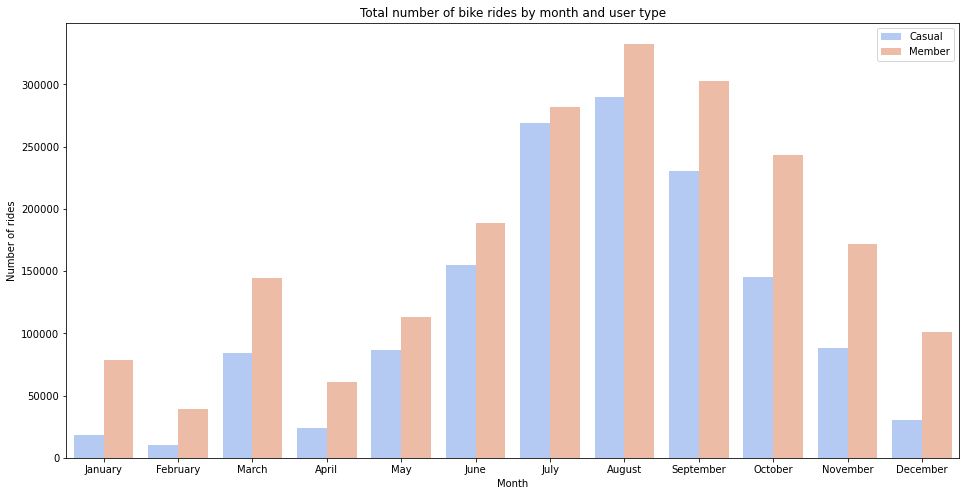

In [146]:
plt.figure(figsize=(16,8))
sns.countplot(x='Month',hue='member_casual',data=df,palette='coolwarm')
plt.title("Total number of bike rides by month and user type")
plt.xlabel("Month")
plt.ylabel("Number of rides")
plt.legend(['Casual','Member'])

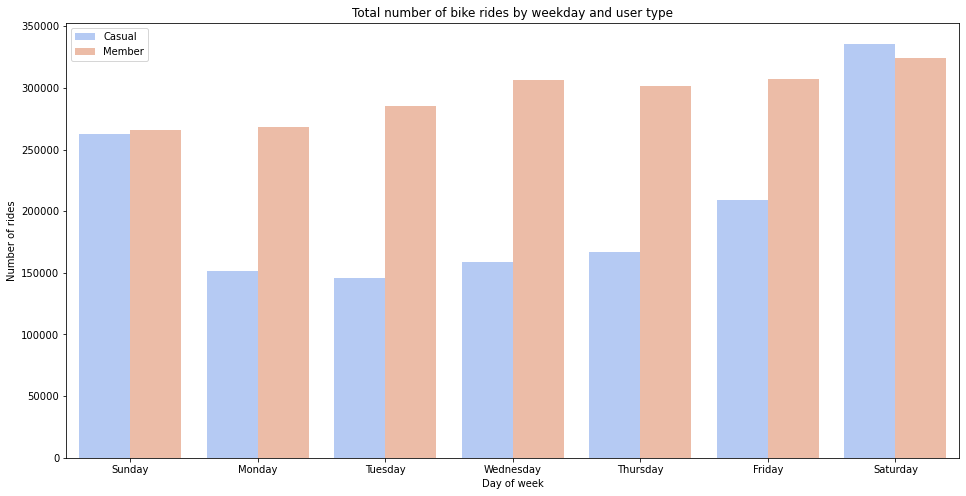

In [145]:
plt.figure(figsize=(16,8))
sns.countplot(x='Day_of_Week',hue='member_casual',data=df,palette='coolwarm')
plt.title("Total number of bike rides by weekday and user type")
plt.xlabel("Day of week")
plt.ylabel("Number of rides")
plt.legend(['Casual','Member'])

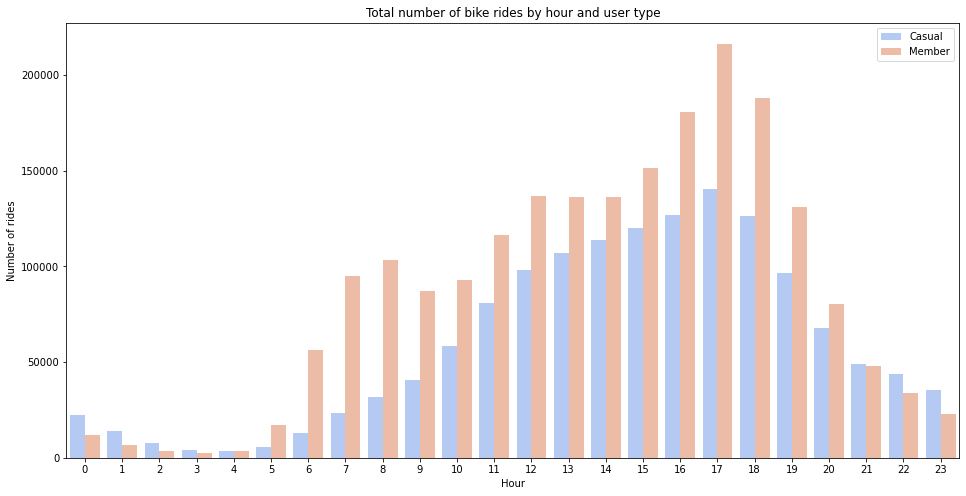

In [144]:
plt.figure(figsize=(16,8))
sns.countplot(x='Hour',hue='member_casual',data=df,palette='coolwarm')
plt.title("Total number of bike rides by hour and user type")
plt.xlabel("Hour")
plt.ylabel("Number of rides")
plt.legend(['Casual','Member'])

In [104]:
df1 = round(df.groupby(['Month', 'member_casual'], as_index=False).mean(),2)

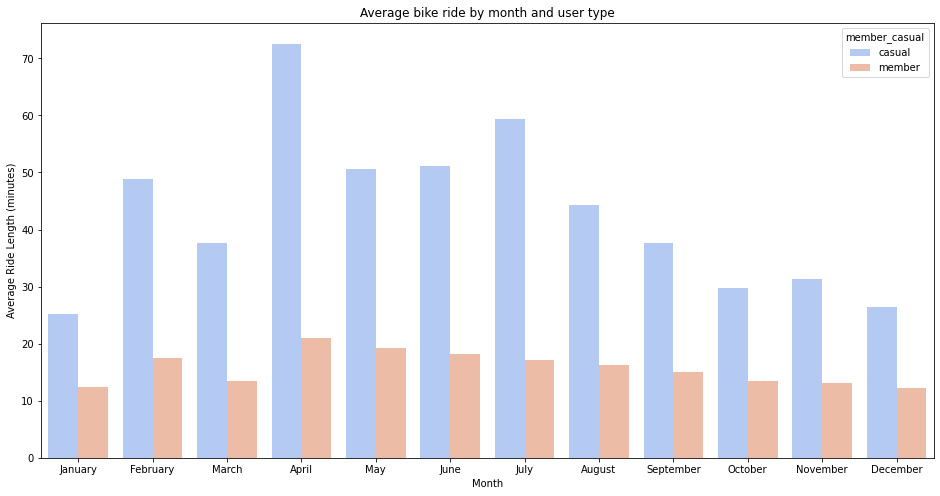

In [143]:
plt.figure(figsize=(16,8))
sns.barplot(data=df1,x='Month',y='ride_length',hue='member_casual',palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Average Ride Length (minutes)')
plt.title('Average bike ride by month and user type');

Text(0.5, 1.0, 'Average bike ride by weekday and user type')

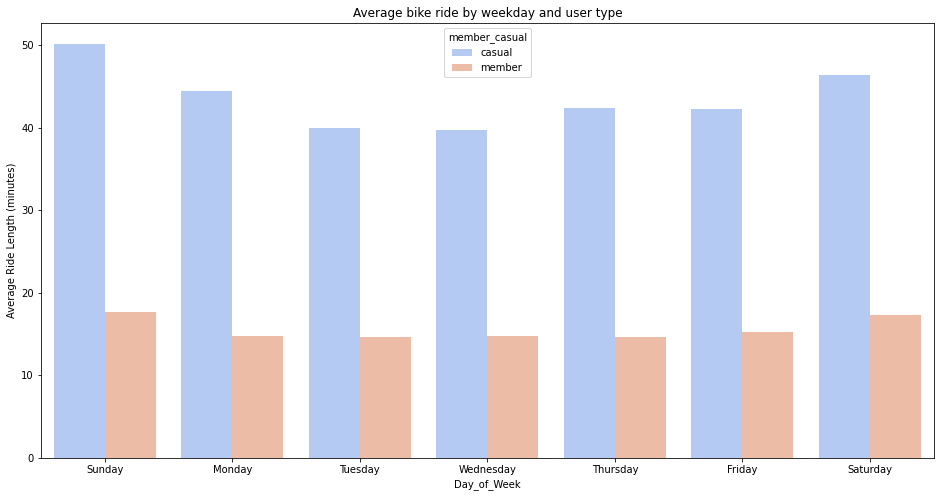

In [142]:
df2 = round(df.groupby(['Day_of_Week', 'member_casual'], as_index=False).mean(),2)
plt.figure(figsize=(16,8))
sns.barplot(data=df2,x='Day_of_Week',y='ride_length',hue='member_casual',palette='coolwarm')
plt.xlabel('Day_of_Week')
plt.ylabel('Average Ride Length (minutes)')
plt.title('Average bike ride by weekday and user type')

Text(0.5, 1.0, 'Average bike ride by hour and user type')

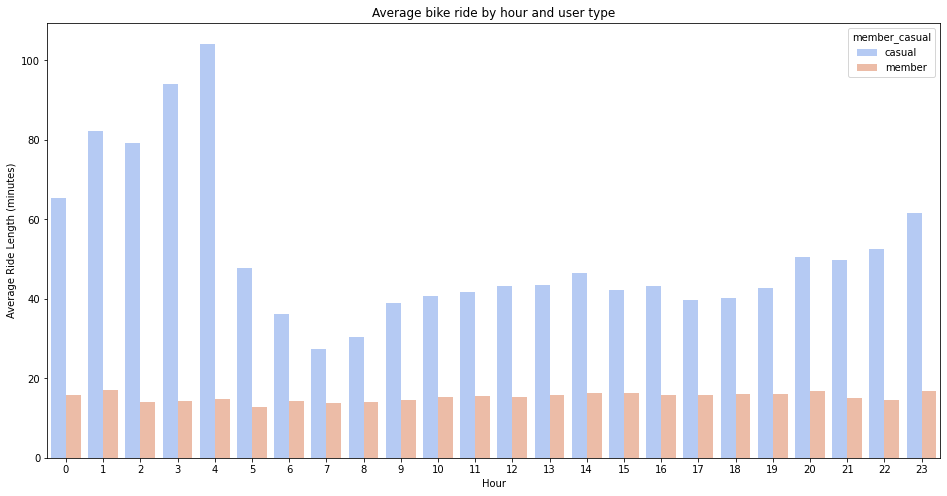

In [147]:
df3 = round(df.groupby(['Hour', 'member_casual'], as_index=False).mean(),2)
plt.figure(figsize=(16,8))
sns.barplot(data=df3,x='Hour',y='ride_length',hue='member_casual',palette='coolwarm')
plt.xlabel('Hour')
plt.ylabel('Average Ride Length (minutes)')
plt.title('Average bike ride by hour and user type')

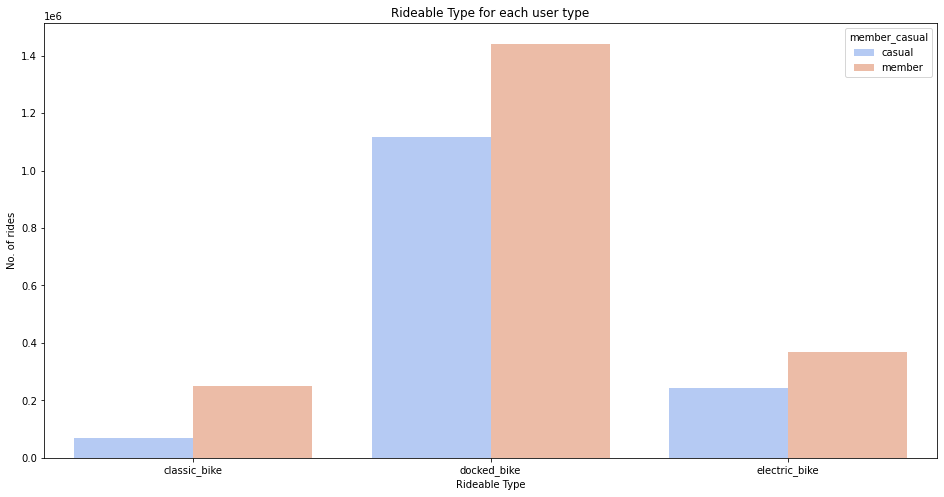

In [148]:
df4 = df.groupby(['rideable_type', 'member_casual'], as_index=False).count()
plt.figure(figsize=(16,8))
sns.barplot(data=df4,x = 'rideable_type', y = 'ride_id',hue='member_casual',palette='coolwarm')
plt.xlabel('Rideable Type')
plt.ylabel('No. of rides')
plt.title('Rideable Type for each user type');

In [159]:
df.groupby(['rideable_type','member_casual'])['ride_id'].count()

rideable_type  member_casual
classic_bike   casual             70801
               member            249071
docked_bike    casual           1116272
               member           1441164
electric_bike  casual            242925
               member            368286
Name: ride_id, dtype: int64

### Act

### Conclusion

### Key Findings
##### From the above visuals we can spot some key differences :

1. Users with an annual membership complete more rides than casual riders
2. Among casual riders, Fridays, Saturdays, and Sundays are the most popular usage days
3. Docked_bike is the most popular rideable type for both casual and members.
4. The average ride length of casual riders are more than twice as of members.
5. From the average ride length difference, we can conclude that Annual members usually use bike share for daily commuting, while casual riders mostly use bike share for leisure rides mostly during Weekends.
6. The demand on bike sharing service changes significantly around the year. Summers are the most popular, while winters see a more than 50% decrease in demand, most likely due to snowfall in Chicago.

### Recommendations
1. A new Annual Membership package for Weekend usage only will attract current Weekend casual riders.
2. Add more docked bikes to inventory given both casual riders and annual members prefer them over classic and electric bikes
3. Promotions aiming at current Weekday casual riders must be implemented. Those promtions must include the financial savings of taking membership when compared to single passes and full day passes for a year long period.